# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Maik| secret |
|Tijn| secret |
|Simon| secret |
|Cesar| secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph, Namespace, Literal, URIRef, BNode
import networkx as nx
from rdflib.namespace import FOAF, DCTERMS, XSD, RDF, SDO, RDFS

# RDF Knowledge Graphs in Python Tutorial

Welkom bij deze tutorial! Vandaag ga je leren hoe je in Python aan het werk kunt gaan met knowledge graphs en het querien met SPARQL. De volgende onderwerpen komen aan bod:

- Introductie + basisprincipes van RDF
- Maken van grafen, namespaces en triples (`rdflib`)
- Praktijkvoorbeeld: het omzetten van een bestaande NetworkX graaf naar een RDF graaf
- SPARQL: het opvragen van data uit de graaf
- Het downloaden van een triple store en dit omzetten naar een NetworkX graaf

Veel plezier!

## Introductie

Gelinkte data is navigeerbaar voor machines en bruikbaar voor mensen. Deze dualiteit tussen RDF (openlijk toegangbare data) en HTML (leesbaar voor mensen) is fundamenteel voor het semantische web. Om de componenten van het semantische web te kunnen realiseren worden vier voorstellen gemaakt:

Voorstel 1: Alles wat genoemd/gebruikt wordt (objects in een Knowledge Graph) behoort een naam te krijgen.

Voorstel 2: Deze namen dienen als adressen op het web. 

Voorstel 3: Relaties creëren een graaf tussen objecten.

Voorstel 4: Maak de betekenis van objecten duidelijk. 


## Basisprincipes

Voordat we gaan programmeren, is het belangrijk dat we een aantal basisprincipes vastleggen.

**RDF** staat voor Resource Description Framework. Het is een formaat om gegevens voor te stellen en uit te wisselen. Oftewel, RDF is een taal om feiten in op te slaan.

De feiten worden opgeslagen in **triples** volgens een vaste structuur (subject-predicaat-object). Dit kan twee verschillende vormen aannemen:
- Een **class** kun je zien als een één-plaatsige relatie uit de predicaatlogica. $Man(Piet)$ wordt in RDF als `<kd:Piet rdf:type kd:Man>` geschreven
- Een **property** kun je zien als een tweeplaatsige relatie uit de predicaat logica. $Vriend(Piet, Henk)$ wordt in RDF als `<kd:Piet kd:vriendenMet kd:Henk>` weergegeven

Om te definiëren als een netwerk: knopen hebben eigenschappen en relaties met andere knopen.


### Hoe zorgen we ervoor dat opgeslagen data niet ambigu zijn?

Je kunt je vast voorstellen het opslaan van feiten een probleem met zich meebrengt. Wat als er meer mensen Piet heten? Welke Piet is dan de vriend van Henk? En zijn er niet meerdere mensen met de naam Henk? Om dit probleem op te lossen zijn er **URI's** (Uniform Resource Identifier). URI’s worden gebruikt om conflicten met namen te voorkomen. Het Resource Description Framework (RDF) gebruikt “resources”. Deze resources worden geïdentificeerd door URI’s. Het internet laat ons een goed voorbeeld zien: ook hier moeten webpagina's een unieke URI (op het web URL) hebben om gevonden te kunnen worden. URL's zijn ook vormen van URI's. https://nl.wikipedia.org/wiki/Uniform_resource_identifier is een URI voor de Wikipedia pagina over URI's. 

Wat voor URI's gebruikt een knowledge graph dan? Dat kan van alles zijn! Een voorbeeld van een knowledge graph is Wikidata. Dit is een knowledge graph gebaseerd op Wikipedia en bevat ontzettend veel data. https://www.wikidata.org/wiki/Q319183 is de URI van de Nederlandse zanger Jan Smit. Let op de unieke code (Q319183) in de link, dit is wat Jan Smit uniek maakt!

HTTP URI’s hebben een “global scope”, wat wil zeggen dat deze uniek zijn door het gehele web. HTTP URI’s functioneren ook als adressen. Ze exploiteren het werkende mechanisme van “webbrowsing”, en het volgt data door het nagaan van de resource-identificeerders die zijn gespecificeerd in de triples. SPARQL is de taal die wordt gebruikt om te kunnen queryen over HTTP. 

Omdat URI’s af en toe lang zijn en lastig te lezen, word er een afkortings mechanisme gebruikt: Namespaces. Namespaces zijn een soort 'plaatsvervangers' voor dit soort links. Terug naar het voorbeeld van Wikidata; zij gebruiken ook Namespaces om door de data te kunnen navigeren door middel van queries. Willen we bijvoorbeeld Jan Smit zoeken, dan kunnen we gebruik maken van de Namespace `wd`. `wd` staat hier als plaatsvervanger voor https://www.wikidata.org/wiki/. Combineer de Namespace met de unieke code van Jan Smit en zo kunnen we Jan Smit zoeken! Dat ziet er zo uit: `wd:Q319183`. Ietsje cryptischer, maar wel een stuk makkelijker in gebruik!


### Opgesomd:

#### Knowledge Graph & Literals

Een Knowledge Graph is een graaf van gelinkte data. Het geeft data context door middel van linking en semantische metadata. Een triple bestaat uit een onderwerp, een predicaat en een object. De elementen van een RDF-triple kunnen ofwel URI-referenties zijn, “blank nodes” of literals. Een literal wordt gebruikt om letterlijke data te representeren. Literals hebben altijd een bepaald data-type.

#### Uniform Resource Identifier (URI) & Namespaces

URI's worden gebruikt om conflicten met namen te voorkomen. Het Resource Description Framework (RDF) gebruikt “resources”. Deze resources worden geïdentificeerd door URI’s. Omdat URI’s af en toe lang zijn en lastig te lezen, word er een afkortings mechanisme gebruikt: Namespaces en Prefixes. 

#### HyperText Transport Protocol (HTTP) & SPARQL

HTTP URI’s hebben een “global scope”, wat wil zeggen dat deze uniek zijn door het gehele web. HTTP URI’s functioneren ook als adressen. Ze exploiteren het werkende mechanisme van “webbrowsing”, en het volgt data door het nagaan van de resource-identificeerders die zijn gespecificeerd in de triples. SPARQL is de taal die wordt gebruikt om te kunnen queryen over HTTP. 

## RDFLIB

Om te kunnen werken met **knowledge graphs** in Python, gaan we gebruik maken van een handige Python module genaamd `rdflib`. 
Deze open-source module maakt het mogelijk om binnen Python te werken met RDF. Daarnaast kan er gebruik worden gemaakt van SPARQL om queries los te laten op deze grafen. Voordat we de module kunnen gebruiken, moeten we hem nog installeren. Run onderstaande code om dit te doen!

Mocht je meer willen weten over `rdflib`, dan kun je ook altijd nog de docs daarover lezen: https://rdflib.readthedocs.io/en/stable/gettingstarted.html

In [3]:
%pip install rdflib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\mklar\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


We gaan zometeen een knowledge graph maken van een bestaande NetworkX graaf, die bestaat uit personen die een ouder-relatie met elkaar kunnen hebben. De personen zelf kunnen een man of vrouw zijn. Om een indruk te krijgen van hoe de graaf ongeveer in elkaar zit, kun je de onderstaande code runnen.

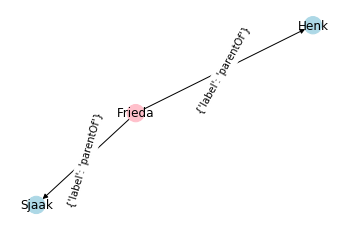

In [4]:
# Familie
G = nx.DiGraph()
G.add_nodes_from({'Henk', 'Sjaak'}, gender='Male')
G.add_nodes_from({'Frieda'}, gender='Female')
G.add_edges_from({('Frieda', 'Henk'), ('Frieda', 'Sjaak')}, label='parentOf')

color_map = nx.get_node_attributes(G, 'gender')
for key in color_map:
    if color_map[key] == 'Male':
        color_map[key] = 'lightblue'
    if color_map[key] == 'Female':
        color_map[key] = 'pink'
gender_colors = [color_map.get(node) for node in G.nodes]

pos = nx.spring_layout(G)

nx.draw_networkx_edge_labels(G, pos=pos)

nx.draw(G, with_labels=True, pos=pos, node_color=gender_colors)

Geen zorgen als je de code niet begrijpt, we gaan verder geen NetworkX behandelen. Kijk eens naar de getekende graaf. De drie personen in de getekende graaf laten een aantal interessante dingen zien:

1. Henk en Sjaak zijn mannen
2. Frieda is een vrouw
3. Frieda is de ouder van (parentOf) Henk en Sjaak

Hoe kunnen we dit omzetten?
Eerder hebben we gezien dat RDF gebruik maakt van zogenoemde 'triples'. `rdflib` geeft deze triples weer in een lijst:

```
[
    (subject0, predicate0, object0),
    (subject1, predicate1, object1),
    ...
    (subjectN, predicateN, objectN)
 ]
```

Dat zou er dus als volgt uit zien volgens onze graaf:


`[('Henk', 'gender', 'Male'), ('Frieda', 'gender', 'Female'), ('Frieda', 'parentOf', 'Henk') ....]`

Een knowledge graph maken met `rdflib` kan op twee verschillende manieren. We kunnen data uit een bestaande knowledge graph inladen. Hieronder staat een voorbeeld hoe dat gaat: 

In [5]:
# Maak een graaf aan
g = Graph()

# g.parse laadt data in van het internet, in dit geval over Tim Berners Lee
result = g.parse("http://www.w3.org/People/Berners-Lee/card")

# Sla alle triples op in een lijst
triples = [(subj, pred, obj) for subj, pred, obj in g]

# Print het eerste element uit de lijst
print(triples[0])

# Print het aantal triples in de graaf
print("Graaf heeft {} triples.".format(len(g)))

(rdflib.term.BNode('N4754ea09a96748eaa11f15ceb4480f68'), rdflib.term.URIRef('http://www.w3.org/2003/01/geo/wgs84_pos#location'), rdflib.term.BNode('N7cde618b21b4487a9034c33d78e52a23'))
Graaf heeft 86 triples.


Zoals je ziet, bestaan de objecten, predicaten en subjecten in de triples uit unieke `URI's`. Deze `URI's` zijn uniek voor elk element in de graaf, zo staat `'https://www.w3.org/People/Berners-Lee/card#i'` voor Tim Berners Lee, `http://www.w3.org/1999/02/22-rdf-syntax-ns#type` voor type, en `http://www.w3.org/2000/10/swap/pim/contact#Male` voor man. Deze triple geeft dus aan dat Tim Berners Lee van het type man is.

Later in de tutorial gaan we uitgebreider in op het downloaden van triples van het internet. Eerst gaan we zelf 'from scratch' een graaf maken.

### Triples toevoegen aan eigen graaf

`rdflib` maakt het ook mogelijk om van eigen data een graaf te maken. Door middel van `g.add()` kun je zelf triples toevoegen aan een graaf. Als we data gebruiken die nog niet op het internet staat (zoals de geïntroduceerde familiegraaf), zullen we eigen unieke `URI's` moeten maken. Daarvoor kunnen we **Namespaces** aanmaken of bestaande gebruiken. Met een import kunnen we bestaande namespaces in ons programma verwerken.

In [6]:
from rdflib.namespace import FOAF, RDF, RDFS

Elke 'node' in de graaf heeft een `URIRef`, is een `BNode` (blank node) of heeft een `Literal`.

- Een `URIRef` is een node waarvan de exacte `URI` bekend is. We zagen dit net bij Tim Berners Lee.
- Een `BNode` is een node waavan de exacte `URI` niet bekend is.
- `Literals` representeren een waarde, bijvoorbeeld een naam, datum of een nummer. 

In [7]:
piet = URIRef('http://knowledgeanddataisfun.org/people/piet')
henk = BNode()
ada = Literal('Ada')

De namespace `FOAF` maakt het bijvoorbeeld mogelijk om het object **persoon** te gebruiken, en `RDF` laat ons **type** gebruiken. Daarnaast kunnen we onze eigen namespace creëren. Voor deze tutorial noemen we deze namespace `kd`. Deze namespace **binden** we vervolgens aan de graaf. Op de volgende manier kunnen we een triple toevoegen, die aangeeft dat Piet van type persoon is:

In [8]:
g = Graph()

g.add((piet, RDF.type, FOAF.Person))

Laten we een stapje verder gaan: we gaan nu de NetworkX graaf maken, waarbij er 3 nodes waren die man of vrouw konden zijn, en waar relaties bestonden die aangaven of het subject de ouder is van het object. Hier moeten we de net behandelde dingen allemaal samenvoegen.

1. We maken een graaf
2. We maken een eigen Namespace en binden deze aan de graaf
3. We definiëren de nodes
4. We voegen triples toe

In [9]:
# Maak een graaf aan
g = Graph()

# Maak een eigen namespace aan
kd = Namespace('kd/')

# We binden de namespaces aan de graaf
g.bind("foaf", FOAF)
g.bind("kd", kd)
g.bind("rdf", RDF)

# We geven de nodes een URI, gebaseerd op de namespace kd
henk = kd['Henk']
sjaak = kd['Sjaak']
frieda = kd['Frieda']

# Triples toevoegen die de subjecten definiëren als personen
g.add((henk, RDF.type, FOAF.Person))
g.add((sjaak, RDF.type, FOAF.Person))
g.add((frieda, RDF.type, FOAF.Person))

# Triples toevoegen die de subjecten een 'gender' geeft (LET OP! Hier gebruiken we dus onze eigen namespace, spannend!)
g.add((henk, kd.gender, kd.Male))
g.add((sjaak, kd.gender, kd.Male))
g.add((frieda, kd.gender, kd.Female))

# Triples toevoegen die relaties aangeven
g.add((frieda, kd.parentOf, henk))
g.add((frieda, kd.parentOf, sjaak))

# Sla alle triples op in een lijst
triples = [(subj, pred, obj) for subj, pred, obj in g]

# Print het eerste element uit de lijst
print(triples[0])

(rdflib.term.URIRef('kd/Frieda'), rdflib.term.URIRef('kd/parentOf'), rdflib.term.URIRef('kd/Henk'))


We zien nu dat de triples succesvol zijn toegevoegd! Tenminste, weten we dat zeker? Er is een goede manier om dit te checken. `g.serialize()` laat een schematisch overzicht zien van de graaf in Turtle. Dit is een text-based syntax voor RDF.

In [10]:
print(g.serialize(format='ttl').decode('u8'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix kd: <kd/> .

kd:Frieda a foaf:Person ;
    kd:gender kd:Female ;
    kd:parentOf kd:Henk,
        kd:Sjaak .

kd:Henk a foaf:Person ;
    kd:gender kd:Male .

kd:Sjaak a foaf:Person ;
    kd:gender kd:Male .




Gaaf! We zien dat het is gelukt! Bovenaan staan de prefixes die aangeven dat de namespaces goed gebonden zijn. Elk subject is een persoon (`foaf:Person`) en heeft een gender (`kd:gender kd:Female`). Daarnaast is Frieda de ouder van Henk en Sjaak (`kd:parentOf`). Denk nog eens terug aan de NetworkX graaf die we aan het begin zagen. De knowledge graph die we nu hebben gemaakt geeft precies hetzelfde weer! 

Een willkeurige triple uit dit netwerk:

```
<kd/Frieda>

<kd/parentOf>

<kd/Henk>```

## Grotere grafen omzetten

Je kent nu alle basics van `rdflib`. Tot nu toe hebben we grafen gemaakt, namespaces gecreëerd en triples toegevoegd. Daarnaast hebben we een theoretische basis gezien van onder andere RDF, URI's en SPARQL. Laten we nu eens een grotere graaf invoegen. We hebben een grotere versie van de NetworkX graaf, maar alles handmatig invoeren kost erg veel tijd. Dit kan natuurlijk handiger! Onderstaande functie zet een NetworkX graaf om in een RDF graaf. Als het goed is, zul je afgezien van het NetworkX deel moeten begrijpen wat er gebeurt!

In [11]:
def networkxRDF(G):
    """ Takes any networkx graph and converts it to a RDF knowledge-graph """
    
    # Aanmaken van Namespaces, scroll naar boven als je nog niet weet hoe dit moet!
    kd2021 = Namespace('kd2021groep23/people/')
    kd = Namespace('kd2021groep23/')
    
    # Het aanmaken van een graaf en het binden van namespaces, scroll naar boven als je nog niet weet hoe dit moet!
    g = Graph()
    g.bind("foaf", FOAF)
    g.bind("kd2021", kd2021)
    g.bind("kd", kd)
    
    # Nu wat meer code om de triples toe te voegen, weet je nog niet wat triples zijn? Scroll naar boven!
    # Geen zorgen over de NetworkX syntax, dat gaan we deze tutorial niet behandelen :)
    for node in G.nodes:
        g.add((kd2021[node], RDFS.label, Literal(node)))
        for attr in G.nodes[node]:
            g.add((kd2021[node], kd[attr], kd[G.nodes[node][attr]]))
    
    for edge in G.edges:
        g.add((kd2021[edge[0]], kd[G.edges[edge]['label']], kd2021[edge[1]]))
    
    return g

Laten we eens kijken of de functie werkt. Dit doen we met een grote familiegraaf, waarbij iedereen een man of vrouw is en er relaties zijn die aangeven of iemand de ouder is van de ander.

In [12]:
# Code die de graaf maakt
m = {'Maik', 'Nik', 'Marko', 'Jaap', 'Kornelis', 'Peter', 'Leonard', 'Menno', 'Sem', 'Mees', 'Dim', 'Luca', 'Mika', 'Bob'} 
v = {'Susanne', 'Bep', 'Jannie', 'Nellie', 'Karen', 'Lisette', 'Lizzy'}

ouder_van = { ('Marko', 'Nik'), ('Marko', 'Maik'), ('Susanne', 'Nik'), ('Susanne', 'Maik'), ('Jaap', 'Susanne'), ('Bep', 'Susanne'), ('Kornelis', 'Marko'), ('Jannie', 'Marko'),
              ('Jaap', 'Peter'), ('Jaap', 'Menno'), ('Jaap', 'Karen'), ('Bep', 'Peter'), ('Bep', 'Menno'), ('Bep', 'Karen'),
              ('Peter', 'Sem'), ('Peter', 'Mees'), ('Peter', 'Dim'), ('Nellie', 'Sem'), ('Nellie', 'Mees'), ('Nellie', 'Dim'),
              ('Leonard', 'Luca'), ('Leonard', 'Mika'), ('Karen', 'Luca'), ('Karen', 'Mika'), ('Menno', 'Bob'), ('Menno', 'Lizzy'), ('Lisette', 'Bob'), ('Lisette', 'Lizzy')}

G = nx.DiGraph()
G.add_nodes_from(m, gender='Male')
G.add_nodes_from(v, gender='Female')
G.add_edges_from(ouder_van, label='parentOf')

We hebben de functie en de graaf. Hoe konden we ook alweer checken of we het gewenste resultaat hebben? Ohja, `g.serialize()`!

In [13]:
graph = networkxRDF(G)

print(graph.serialize(format='ttl').decode('u8'))

@prefix kd: <kd2021groep23/> .
@prefix kd2021: <kd2021groep23/people/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

kd2021:Bep rdfs:label "Bep" ;
    kd:gender kd:Female ;
    kd:parentOf kd2021:Karen,
        kd2021:Menno,
        kd2021:Peter,
        kd2021:Susanne .

kd2021:Jaap rdfs:label "Jaap" ;
    kd:gender kd:Male ;
    kd:parentOf kd2021:Karen,
        kd2021:Menno,
        kd2021:Peter,
        kd2021:Susanne .

kd2021:Jannie rdfs:label "Jannie" ;
    kd:gender kd:Female ;
    kd:parentOf kd2021:Marko .

kd2021:Kornelis rdfs:label "Kornelis" ;
    kd:gender kd:Male ;
    kd:parentOf kd2021:Marko .

kd2021:Leonard rdfs:label "Leonard" ;
    kd:gender kd:Male ;
    kd:parentOf kd2021:Luca,
        kd2021:Mika .

kd2021:Lisette rdfs:label "Lisette" ;
    kd:gender kd:Female ;
    kd:parentOf kd2021:Bob,
        kd2021:Lizzy .

kd2021:Nellie rdfs:label "Nellie" ;
    kd:gender kd:Female ;
    kd:parentOf kd2021:Dim,
        kd2021:Mees,
        kd2021:Sem .

kd202

Een triple uit ons netwerk ziet er nu zo uit:

```
<kd2021groep23/people/Marko>

<kd2021groep23/parentOf>

<kd2021groep23/people/Maik>
```

Leuk, we hebben een graaf gemaakt, maar wat kunnen we er nu mee? Nou, een heleboel spannende dingen! We kunnen bijvoorbeeld zoeken of iemand in een graaf zit.

In [14]:
maik = URIRef('kd2021groep23/people/Maik')
piet = URIRef('kd2021groep23/people/Piet')

if (maik, None, None) in graph:
    print('Yes! Maik gevonden in de graaf!')
else:
    print('Oh, Maik lijkt er niet in te zitten...')
if (piet, None, None) in graph:
    print('Yes! Piet gevonden in de graaf!')
else:
    print('Oh, Piet lijkt er niet in te zitten...')

Yes! Maik gevonden in de graaf!
Oh, Piet lijkt er niet in te zitten...


# Querien met SPARQL


Om data die is opgeslagen in een RDF-vorm te kunnen verkrijgen gebruik je SPARQL. Je schrijft queries die bepaalde data zoeken die aan bepaalde eisen voldoen. Als de RDF-graph ‘voorbeeld’ heet gebruik je in rdflib:<p>
voorbeeld.query(“””…””’)<p>
om een query op de data uit te voeren. Op de plaats van de … vul je een query in. Je kunt een variabele aanmaken die de query  als waarde heeft. Als je deze variabele vervolgens opvraagt door middel van<p>
list(voorbeeld)<p>
is de variabele een lijst met tuples. De tuples zullen bestaan uit de waardes die je in de SPARQL-query opvraagt.


### SELECT en WHERE
In de query zelf heb je een SELECT clausule die de variabelen die in het resultaat van de query moeten voorkomen weergeeft. Hier zet je dus de variabelen neer die je in de output wil hebben. In de WHERE-clausule zet je patronen waar de data op getest moeten worden en waar de data aan moet voldoen. Je specificeert hier welke van de geselecteerde variabelen wel in de output komen en welke niet. 
#### Voorbeeld ouders (DISTINCT en syntax)
Laten we eens naar een voorbeeld kijken. Wat moeten we voor query laten uitvoeren als we alle ouders uit de RDG graph van de familiegraaf willen halen?

In [15]:
Ouders = graph.query("""SELECT DISTINCT ?oName ?sName
                      WHERE {?oName kd:parentOf ?sName.}""")
list(Ouders)[:5]

[(rdflib.term.URIRef('kd2021groep23/people/Karen'),
  rdflib.term.URIRef('kd2021groep23/people/Luca')),
 (rdflib.term.URIRef('kd2021groep23/people/Jaap'),
  rdflib.term.URIRef('kd2021groep23/people/Karen')),
 (rdflib.term.URIRef('kd2021groep23/people/Nellie'),
  rdflib.term.URIRef('kd2021groep23/people/Dim')),
 (rdflib.term.URIRef('kd2021groep23/people/Jaap'),
  rdflib.term.URIRef('kd2021groep23/people/Susanne')),
 (rdflib.term.URIRef('kd2021groep23/people/Marko'),
  rdflib.term.URIRef('kd2021groep23/people/Maik'))]

Het vraagteken met een string erachter kan iedere node of persoon zijn in de data. Deze query selecteert dus een oName en sName en kijkt of oName een ‘parentOf’ relatie heeft met sName. Dus de oName en sName worden toegevoegd aan de output als ze voldoen aan de WHERE-clausule die in dit geval is dat oName de ouder is van sName. Het woord DISTINCT geeft aan dat de variabelen ?oName en ?sName een andere unieke combinatie moet zijn en dat combinaties die gelijk zijn aan elkaar maar 1 keer worden toegevoegd aan de output. De waardes van de variabelen of de relaties van variabelen die worden gecontroleerd in de WHERE clausule staan binnen de {}. De kd: is een namespace die is aangemaakt waar deze relatie in staat. 
#### Voorbeeld opa
Laten we eens kijken naar een iets meer gecompliceerde query waarbij we alle opa's uit de RDF graph als output willen.

In [16]:
opa = graph.query("""SELECT DISTINCT ?opaName ?kleinkindName 
                      WHERE {?opa kd:parentOf ?s;
                                  kd:gender kd:Male;
                                  rdfs:label ?opaName. 
                             ?s kd:parentOf ?kleinkind. 
                             ?kleinkind rdfs:label ?kleinkindName.}""")

for row in opa:
    print("%s is de opa van %s" % row)


Jaap is de opa van Nik
Jaap is de opa van Maik
Jaap is de opa van Mees
Jaap is de opa van Sem
Jaap is de opa van Dim
Jaap is de opa van Mika
Jaap is de opa van Luca
Jaap is de opa van Bob
Jaap is de opa van Lizzy
Kornelis is de opa van Maik
Kornelis is de opa van Nik


Hier is te zien dat er meer variabelen worden gebruikt. De ; in deze query betekent dat de node/persoon ?opa wordt gecontroleerd op meerdere waarden. Dus in dit geval wordt gekeken of ?opa ouder is van ?s, of zijn geslacht man is en dan wordt van zijn label (naam in dit geval) de variabele ?opaName gemaakt. De . in de queries betekent dat er een nieuwe variabele gecontroleerd wordt.<br>
#### Voorbeeld broer (FILTER)
We kijken nog naar één ander voorbeeld die nog iets langer is. We gaan namelijk broers uit de graph halen.


In [17]:
broer = graph.query("""SELECT DISTINCT ?oName ?sName 
                      WHERE {
                      ?ouder1 kd:parentOf ?s;
                              kd:parentOf ?o;
                              kd:gender kd:Male. 
                      ?ouder2 kd:parentOf ?s;
                              kd:parentOf ?o;
                              kd:gender kd:Female.
                      ?o kd:gender kd:Male;
                         rdfs:label ?oName.
                      ?s rdfs:label ?sName
                      FILTER(?o != ?s)}""")

for row in broer:
    print("%s is de broer van %s" % row)

Mika is de broer van Luca
Maik is de broer van Nik
Menno is de broer van Susanne
Menno is de broer van Peter
Menno is de broer van Karen
Luca is de broer van Mika
Dim is de broer van Mees
Dim is de broer van Sem
Mees is de broer van Sem
Mees is de broer van Dim
Bob is de broer van Lizzy
Peter is de broer van Susanne
Peter is de broer van Karen
Peter is de broer van Menno
Nik is de broer van Maik
Sem is de broer van Mees
Sem is de broer van Dim


Eigenlijk is de query niet veel ingewikkelder dan die van opa. Wat misschien opvalt is dat bij deze query een FILTER is toegevoegd binnen de WHERE clausule. Wat doet zo'n filter? Je kunt hierin een conditie toevoegen en de gevallen waarin dit filter true is worden toegevoegd aan de output. Dus in ons vooreeld als ?o niet gelijk is aan ?s dan is de filter TRUE en worden de waarden dus toegevoegd aan de output. <p>
Hieronder worden nog een hoop voorbeelden genoemd van queries die een bepaalde familierelatie ophaalt uit de graph. 

In [18]:
oma = graph.query("""SELECT DISTINCT ?omaName ?kleinkindName 
                      WHERE {?oma kd:parentOf ?s;
                                  kd:gender kd:Female;
                                  rdfs:label ?omaName. 
                             ?s kd:parentOf ?kleinkind. 
                             ?kleinkind rdfs:label ?kleinkindName}""")

for row in oma:
    print("%s is de oma van %s" % row)

Bep is de oma van Mika
Bep is de oma van Luca
Bep is de oma van Mees
Bep is de oma van Sem
Bep is de oma van Dim
Bep is de oma van Nik
Bep is de oma van Maik
Bep is de oma van Bob
Bep is de oma van Lizzy
Jannie is de oma van Maik
Jannie is de oma van Nik


In [19]:
zus = graph.query("""SELECT DISTINCT ?oName ?sName 
                      WHERE {
                      ?ouder1 kd:parentOf ?s;
                              kd:parentOf ?o;
                              kd:gender kd:Male. 
                      ?ouder2 kd:parentOf ?s;
                              kd:parentOf ?o;
                              kd:gender kd:Female.
                      ?o kd:gender kd:Female;
                         rdfs:label ?oName.
                      ?s rdfs:label ?sName
                      FILTER(?o != ?s)}""")

for row in zus:
    print("%s is de zus van %s" % row)

Lizzy is de zus van Bob
Karen is de zus van Susanne
Karen is de zus van Peter
Karen is de zus van Menno
Susanne is de zus van Peter
Susanne is de zus van Karen
Susanne is de zus van Menno


In [20]:
neef = graph.query("""SELECT DISTINCT ?oName ?sName
                     WHERE {?ouder kd:parentOf ?s.
                     ?opa kd:parentOf ?ouder.
                     ?opa kd:parentOf ?x.
                     ?x kd:parentOf ?o.
                     ?o kd:gender kd:Male;
                        rdfs:label ?oName.
                     ?s rdfs:label ?sName.
                    FILTER(?x != ?ouder)}""") 

for row in neef:
    print("%s is de neef van %s" % row)

Mika is de neef van Mees
Mika is de neef van Sem
Mika is de neef van Dim
Mika is de neef van Nik
Mika is de neef van Maik
Mika is de neef van Bob
Mika is de neef van Lizzy
Maik is de neef van Mees
Maik is de neef van Sem
Maik is de neef van Dim
Maik is de neef van Mika
Maik is de neef van Luca
Maik is de neef van Bob
Maik is de neef van Lizzy
Luca is de neef van Mees
Luca is de neef van Sem
Luca is de neef van Dim
Luca is de neef van Nik
Luca is de neef van Maik
Luca is de neef van Bob
Luca is de neef van Lizzy
Dim is de neef van Mika
Dim is de neef van Luca
Dim is de neef van Nik
Dim is de neef van Maik
Dim is de neef van Bob
Dim is de neef van Lizzy
Mees is de neef van Mika
Mees is de neef van Luca
Mees is de neef van Nik
Mees is de neef van Maik
Mees is de neef van Bob
Mees is de neef van Lizzy
Bob is de neef van Mika
Bob is de neef van Luca
Bob is de neef van Mees
Bob is de neef van Sem
Bob is de neef van Dim
Bob is de neef van Nik
Bob is de neef van Maik
Nik is de neef van Mees
Ni

In [21]:
nicht = graph.query("""SELECT DISTINCT ?oName ?sName
                      WHERE {
                      ?ouder kd:parentOf ?s.
                      ?ogouder kd:parentOf ?ouder.
                      ?ogouder kd:parentOf ?ogkind.
                      ?ogkind kd:parentOf ?o.
                      ?o kd:gender kd:Female;
                            rdfs:label ?oName.
                      ?s rdfs:label ?sName
                      FILTER(?ogkind != ?ouder)}""")
for row in nicht:
    print("%s is de nicht van %s" % row)

Lizzy is de nicht van Mika
Lizzy is de nicht van Luca
Lizzy is de nicht van Mees
Lizzy is de nicht van Sem
Lizzy is de nicht van Dim
Lizzy is de nicht van Nik
Lizzy is de nicht van Maik


In [22]:
vader = graph.query("""SELECT DISTINCT ?oName ?sName
                      WHERE {
                      ?o kd:parentOf ?s.
                      ?o kd:gender kd:Male;
                            rdfs:label ?oName.
                      ?s rdfs:label ?sName}""")
for row in vader:
    print("%s is de vader van %s" % row)

Marko is de vader van Maik
Marko is de vader van Nik
Menno is de vader van Bob
Menno is de vader van Lizzy
Leonard is de vader van Luca
Leonard is de vader van Mika
Jaap is de vader van Susanne
Jaap is de vader van Peter
Jaap is de vader van Karen
Jaap is de vader van Menno
Kornelis is de vader van Marko
Peter is de vader van Mees
Peter is de vader van Sem
Peter is de vader van Dim


In [23]:
moeder = graph.query("""SELECT DISTINCT ?oName ?sName
                      WHERE {
                      ?o kd:parentOf ?s.
                      ?o kd:gender kd:Female;
                            rdfs:label ?oName.
                      ?s rdfs:label ?sName}""")
for row in moeder:
    print("%s is de moeder van %s" % row)

Bep is de moeder van Karen
Bep is de moeder van Peter
Bep is de moeder van Susanne
Bep is de moeder van Menno
Karen is de moeder van Mika
Karen is de moeder van Luca
Nellie is de moeder van Dim
Nellie is de moeder van Mees
Nellie is de moeder van Sem
Susanne is de moeder van Nik
Susanne is de moeder van Maik
Jannie is de moeder van Marko
Lisette is de moeder van Lizzy
Lisette is de moeder van Bob


In [24]:
zoon = graph.query("""SELECT DISTINCT ?sName ?oName
                      WHERE {
                      ?o kd:parentOf ?s.
                      ?s kd:gender kd:Male;
                            rdfs:label ?sName.
                      ?o rdfs:label ?oName.}""")
for row in zoon:
    print("%s is de zoon van %s" % row)

Marko is de zoon van Kornelis
Marko is de zoon van Jannie
Mika is de zoon van Karen
Mika is de zoon van Leonard
Maik is de zoon van Susanne
Maik is de zoon van Marko
Menno is de zoon van Bep
Menno is de zoon van Jaap
Luca is de zoon van Leonard
Luca is de zoon van Karen
Dim is de zoon van Nellie
Dim is de zoon van Peter
Mees is de zoon van Nellie
Mees is de zoon van Peter
Bob is de zoon van Menno
Bob is de zoon van Lisette
Peter is de zoon van Bep
Peter is de zoon van Jaap
Nik is de zoon van Susanne
Nik is de zoon van Marko
Sem is de zoon van Nellie
Sem is de zoon van Peter


In [25]:
dochter = graph.query("""SELECT DISTINCT ?sName ?oName
                      WHERE {
                      ?o kd:parentOf ?s.
                      ?s kd:gender kd:Female;
                            rdfs:label ?sName.
                      ?o rdfs:label ?oName.}""")
for row in dochter:
    print("%s is de dochter van %s" % row)

Lizzy is de dochter van Lisette
Lizzy is de dochter van Menno
Karen is de dochter van Bep
Karen is de dochter van Jaap
Susanne is de dochter van Jaap
Susanne is de dochter van Bep


### Een ander voorbeeld: LHBTQI++ relaties en (NOT) EXISTS 
Hieronder wordt een ander soort relatie dan familierelaties opgevraagd door queries. We gaan op zoek naar welke van de personen uit een nieuwe RDF graph welke seksualiteit heeft. Allereerst maken we een networkx graph en zetten we deze om naar een RDF graph met de functie die we al eerder hebben gemaakt.   

@prefix kd: <kd2021groep23/> .
@prefix kd2021: <kd2021groep23/people/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

kd2021:Pan1 rdfs:label "Pan1" ;
    kd:attractedTo kd2021:Queer1 ;
    kd:bio_gender kd:Female ;
    kd:i_gender kd:Female .

kd2021:Trans2 rdfs:label "Trans2" ;
    kd:attractedTo kd2021:Lesbi2 ;
    kd:bio_gender kd:Male ;
    kd:i_gender kd:Female .

kd2021:Bi1 rdfs:label "Bi1" ;
    kd:attractedTo kd2021:Homo1,
        kd2021:Lesbi2,
        kd2021:Trans1 ;
    kd:bio_gender kd:Male ;
    kd:i_gender kd:Male .

kd2021:Interseks1 rdfs:label "Interseks1" ;
    kd:attractedTo kd2021:Homo1 ;
    kd:bio_gender kd:Male ;
    kd:bio_gender2 kd:Female ;
    kd:i_gender kd:Female .

kd2021:Lesbi1 rdfs:label "Lesbi1" ;
    kd:attractedTo kd2021:Lesbi2 ;
    kd:bio_gender kd:Female ;
    kd:i_gender kd:Female .

kd2021:Queer1 rdfs:label "Queer1" ;
    kd:attractedTo kd2021:Interseks1,
        kd2021:Lesbi2 ;
    kd:bio_gender kd:Male .

kd2021:Trans1 rdfs:label "Tr

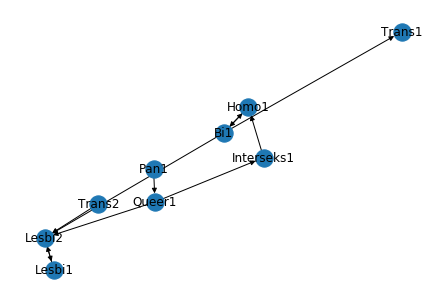

In [26]:
H = nx.DiGraph()

m = {'Homo1', 'Bi1', 'Interseks1', 'Queer1', 'Trans2'} 
v = {'Lesbi1', 'Lesbi2', 'Interseks1', 'Trans1', 'Pan1'}
im = {'Homo1', 'Bi1', 'Trans1'}
iv = {'Lesbi1', 'Lesbi2', 'Pan1', 'Trans2', 'Interseks1'}

H.add_nodes_from((m|v|im|iv))
    
for n in m:
    H.nodes[n]['bio_gender']='Male'

for n in v:
    if n in m:
        H.nodes[n]['bio_gender2']='Female'
    else:
        H.nodes[n]['bio_gender']='Female'
    
for n in im:
    H.nodes[n]['i_gender']='Male'
    
for n in iv:
    if n in im:
        H.nodes[n]['i_gender2']='Female'
    else:
        H.nodes[n]['i_gender']='Female'
    
    

relaties = {('Homo1', 'Bi1'), ('Lesbi1', 'Lesbi2'), ('Bi1', 'Homo1'), 
            ('Lesbi2', 'Lesbi1'), ('Bi1', 'Lesbi2'), ('Interseks1', 'Homo1'), 
            ('Queer1', 'Lesbi2'), ('Queer1', 'Interseks1'), ('Bi1', 'Trans1'),
            ('Pan1', 'Queer1'), ('Trans2', 'Lesbi2')}

H.add_edges_from(relaties, label='attractedTo')

nx.draw(H, with_labels=True)

g = networkxRDF(H)

print(g.serialize(format='ttl').decode('u8'))

Eigenlijk kun zijn de queries goed te bergijpen met de bovenstaande uitleg. Er komt alleen 1 nieuw aspect bij namelijk (NOT) EXISTS. En wat doet dit deel van de query? Laten we kijken naar een voorbeeld waarbij we alle homoseksuelen uit de graph willen halen. 

In [27]:
homo = g.query("""SELECT DISTINCT ?oName 
                      WHERE {?o kd:attractedTo ?s;
                                kd:i_gender kd:Male;
                                rdfs:label ?oName. 
                             ?s kd:i_gender kd:Male.
                        FILTER (NOT EXISTS {
                             ?o kd:attractedTo ?b.
                             ?b kd:i_gender kd:Female.})}""")
for row in homo:
    print("%s is homo" % row)

Homo1 is homo


We weten al wat een filter doet, namelijk de waarden van de filter die hem false maken uit de output halen. In dit voorbeeld staat in de filter NOT EXISTS. Wat NOT EXISTS eigenlijk doet is de subquery die binnen zijn haken staat uitvoeren en kijken of er een output is. Als we zeggen NOT EXISTS dan zal de hij true returnen als de subquery een lege output heeft. Dus in dit voorbeeld zal hij true returnen als er geen ?b is waar ?o zich tot aangetrokken voelt die ook vrouw is. Dus als ?o zich niet aangetrokken voelt tot een vrouw is de output leeg en zal er true uitkomen. Als dit wel het geval zou zijn wordt het false, wordt de FILTER false en worden de waardes niet toegevoegd aan de output. <p>
Hieronder staat ook hoe de andere relaties gevonden moeten worden. 

In [28]:
lesbisch = g.query("""SELECT DISTINCT ?oName 
                      WHERE {?o kd:attractedTo ?s;
                                kd:i_gender kd:Female;
                                rdfs:label ?oName. 
                             ?s kd:i_gender kd:Female.
                            FILTER( NOT EXISTS {
                                 ?o kd:attractedTo ?b.
                                 ?b kd:i_gender kd:Male.
                            })}""")

for row in lesbisch:
    print("%s is lesbisch" % row)

Lesbi2 is lesbisch
Lesbi1 is lesbisch
Trans2 is lesbisch


In [29]:
trans = g.query("""SELECT DISTINCT ?oName
                  WHERE {
                      ?o kd:i_gender ?iGender;
                         kd:bio_gender ?bioGender;
                         rdfs:label ?oName.
                      FILTER (?iGender != ?bioGender)
                      FILTER (NOT EXISTS {?o kd:bio_gender2 ?biogender2})
                  }""")

for row in trans:
    print("%s is transgender" % row)

Trans2 is transgender
Trans1 is transgender


In [30]:
Bi = g.query("""SELECT DISTINCT ?oName
                  WHERE {
                      ?o kd:attractedTo ?s;
                         kd:attractedTo ?b;
                         rdfs:label ?oName.
                      ?s kd:i_gender kd:Male.
                      ?b kd:i_gender kd:Female.
                  }""")

for row in Bi:
    print("%s is bi" % row)

Bi1 is bi


In [31]:
queer = g.query("""SELECT DISTINCT ?oName
                  WHERE {
                      ?o rdfs:label ?oName.
                      FILTER(NOT EXISTS{
                          ?o kd:i_gender ?iGender
                      })
                  }""")

for row in queer:
    print("%s is queer" % row)

Queer1 is queer


In [32]:
interseks = g.query("""SELECT DISTINCT ?oName
                  WHERE {
                      ?o rdfs:label ?oName;
                         kd:bio_gender kd:Male;
                         kd:bio_gender2 kd:Female.
                  }""")

for row in interseks:
    print("%s is interseks" % row)

Interseks1 is interseks


## RDF naar Networkx

### Tutorial: Het convergeren word nu omgekeerd: van RDF Knowledge Graph naar Networkx Graph

Als eerste stap zal er een functie moeten worden geimporteert uit de rdf library die hiervoor handig is. Dat is de `rdflib_to_dinetworkx_graph`. Vervolgens zal er een willekeurige RDF dataset  kunnen worden gekozen om te convergeren naar een networkx graaf met nodes en edges. Wel is het hierbij handig om te letten op de grootte van de dataset. De gekozen dataset gaat over de ontzettend succesvolle Nederlandse Toppers. Het was een relatief kleinere dataset dus deze werkt, maar resulteert nu al in een enorm informatiedichte graaf zoals hieronder te zien is. 

Bij het berekenen van de centrummaten zijn geen uitzonderlijke resultaten te zien, echter geeft dit wel een helder beeld van de berekeningen die gedaan kunnen worden met data in de vorm van een networkx graaf.

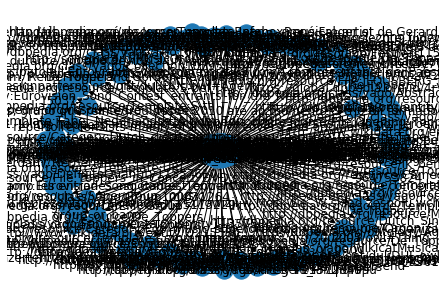

In [33]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
import networkx as nx
import matplotlib.pyplot as plt

url = 'https://dbpedia.org/resource/De_Toppers'

g = rdflib.Graph()
result = g.parse(url, format='turtle')

G = rdflib_to_networkx_digraph(result)

# Plot Networkx version of RDF Graph
pos = nx.spring_layout(G, scale=2)

nx.draw(G, pos, with_labels=True)

### Netwerkmaten

Wanneer data is geconvergeerd naar een networkx met knopen en edges, kunnen er vervolgens bepaalde netwerkmaten worden berekend. Drie van de meest bekende maten zijn: Density, Closeness Centrality, en Betweenness Centrality.

- Density: hiermee wordt een ratio berekend aan de hand van het aantal bestaande relaties (edges) en het totaal aantal mogelijke relaties. 


- Closeness Centrality: deze maat berekend voor elke knoop in een graaf hoe "centraal" deze is. Dit wordt gedaan door het optellen van de lengtes van alle kortste paden tussen die specifieke knoop en de andere knoop in de graaf.


- Betweenness Centrality: deze maat berekend ook de centraliteit van een knoop in een graaf, maar dan aan de hand van het aantal korste paden tussen twee knoop dat door die specifieke knoop heen gaat. 

#### Density 

Aan de hieronder berekende density is te zien hoe weinig relaties er zich tussen de knopen bevinden vergeleken met hoeveel het er hadden kunnen zijn. De density voor deze graaf is erg laag, wat betekent dat er weinig relaties tussen de knopen zijn. Dit is begrijpelijk, want De Toppers hebben bijvoorbeeld relaties met uitgebrachte nummers, maar die nummers onderling niet.

In [34]:
density = nx.density(G)
density

0.0065651828872375735

#### Closeness Centrality 

De knopen hebben een vrij lage closeness centrality. De hoogste centrality hoort bij de knoop van de toppers zelf, zij zijn dus het meest 'centraal'. Logisch ook, want de pagina gaat over hun.

In [35]:
closeness = nx.closeness_centrality(G)
closeness

{rdflib.term.URIRef('http://dbpedia.org/resource/Gordon_Heuckeroth'): 0.09791547140944731,
 rdflib.term.URIRef('http://dbpedia.org/resource/De_Toppers'): 0.1927710843373494,
 rdflib.term.URIRef('http://dbpedia.org/ontology/Group'): 0.10092678405931417,
 rdflib.term.URIRef('http://dbpedia.org/resource/Jan_Smit_(singer)'): 0.09791547140944731,
 rdflib.term.Literal('De Toppers', lang='en'): 0.10092678405931417,
 rdflib.term.URIRef('http://dbpedia.org/resource/List_of_entries_in_the_Eurovision_Song_Contest'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/class/yago/Number113582013'): 0.10092678405931417,
 rdflib.term.URIRef('http://es.dbpedia.org/resource/De_Toppers'): 0.10092678405931417,
 rdflib.term.URIRef('http://de.dbpedia.org/resource/De_Toppers'): 0.10092678405931417,
 rdflib.term.URIRef('http://commons.wikimedia.org/wiki/Special:FilePath/De_Toppers_2009.jpg?width=300'): 0.10092678405931417,
 rdflib.term.Literal('Toppers', lang='nl'): 0.10092678405931417,
 rdflib.term.URIRef('http://

#### Betweenness Centrality 

Hier is tevens uit af te leiden dat er geen onderlinge relaties tussen de knopen uitgedrukt is in de dataset; de betweenness centrality voor bijna elke knoop is 0.0, en voor de Toppers knoop is het ietsje hoger. 

In [36]:
betweenness = nx.betweenness_centrality(G)
betweenness

{rdflib.term.URIRef('http://dbpedia.org/resource/Gordon_Heuckeroth'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/resource/De_Toppers'): 0.17353048557867834,
 rdflib.term.URIRef('http://dbpedia.org/ontology/Group'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/resource/Jan_Smit_(singer)'): 0.0,
 rdflib.term.Literal('De Toppers', lang='en'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/resource/List_of_entries_in_the_Eurovision_Song_Contest'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/class/yago/Number113582013'): 0.0,
 rdflib.term.URIRef('http://es.dbpedia.org/resource/De_Toppers'): 0.0,
 rdflib.term.URIRef('http://de.dbpedia.org/resource/De_Toppers'): 0.0,
 rdflib.term.URIRef('http://commons.wikimedia.org/wiki/Special:FilePath/De_Toppers_2009.jpg?width=300'): 0.0,
 rdflib.term.Literal('Toppers', lang='nl'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/class/yago/Set107996689'): 0.0,
 rdflib.term.URIRef('http://dbpedia.org/resource/EMI'): 0.0,
 rdflib.term.URIRef('http://dbpedia.or